In [1]:
import torch
import numpy as np

### tensor（张量）

In [29]:
a = torch.Tensor([[1,2],[2,3],[3,4]])
print("a is {}".format(a))
print("a size is {}".format(a.size()))

a is tensor([[1., 2.],
        [2., 3.],
        [3., 4.]])
a size is torch.Size([3, 2])


In [6]:
b = torch.LongTensor([[1,2],[2,3],[3,4]])
print("a is {}".format(b))
print("a size is {}".format(b.size()))

a is tensor([[1, 2],
        [2, 3],
        [3, 4]])
a size is torch.Size([3, 2])


In [31]:
c = torch.zeros((3,2))
print(c)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [10]:
d = torch.rand((3,2))
print(d)

tensor([[0.8751, 0.5149],
        [0.2535, 0.3421],
        [0.7144, 0.0480]])


In [12]:
a[2,0] = 100
print(a)

tensor([[  1,   2],
        [  2,   3],
        [100,   4]])


In [14]:
# tensor 和 numpy之间相互转化
nubpy_d = d.numpy()
print(nubpy_d)

[[ 0.87511474  0.5149321 ]
 [ 0.25347483  0.34208149]
 [ 0.71441466  0.04800117]]


In [16]:
e = np.array([[1,2],[3,4]])
print(e)

[[1 2]
 [3 4]]


In [17]:
torch_e = torch.from_numpy(e)
print(torch_e)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [18]:
f_torch_e = torch_e.float()
print(f_torch_e)

tensor([[1., 2.],
        [3., 4.]])


In [2]:
# 访问GPU
# if torch.cuda.is_available():
#     a_cuda = a.cuda()
#     print(a.cuda)
torch.cuda.is_available()

True

###  Variable（变量）

In [36]:
# create variable
from torch.autograd import Variable
x = Variable(torch.Tensor([5]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)

# build
y = w*x+b

# comput gradients
y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

tensor([2.])
tensor([5.])
tensor([1.])


In [53]:
# 矩阵求导
x = torch.rand(3)
print(x)
x = Variable(x,requires_grad=True)
y = x*2
print(y)
y.backward(torch.FloatTensor([1,0.1,0.01]))
print(x.grad)

tensor([0.5533, 0.2766, 0.4170])
tensor([1.1066, 0.5532, 0.8340], grad_fn=<MulBackward0>)
tensor([2.0000, 0.2000, 0.0200])


### 3 Dataset（数据集）

### 4 nn.Module（模组）

### 5 torch.optim（优化）

### 6 模型的保存和加载

In [55]:
# 保存
torch.save(model,"路径")
# 加载
load_model = torch.load("model.pth")

NameError: name 'model' is not defined

### 3.2 线性模型

### 3.2.2 一维线性回归

In [58]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2017)

In [60]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

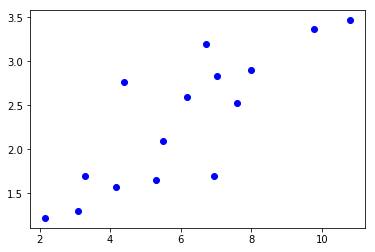

In [61]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'bo')

In [62]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [63]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [64]:
y_ = linear_model(x_train)